# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install necessary libraries
!pip install pandas -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install scikit-learn -q
!pip install scikit-learn -q
!pip install tensorflow -q
!pip install keras -q

In [ ]:
# Importing data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning and preprocessing libraries
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.preprocessing import StandardScaler   # For scaling data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Importing essential libraries
import tensorflow as tf               # Core deep learning framework
from tensorflow import keras           # High-level API for building neural networks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout  # Import specific layers
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Load the dataset
hdf = pd.read_csv('/content/drive/MyDrive/Final_project/heart.csv')

# Check the shape of the dataset (rows, columns)
print(f"Shape:\n", hdf.shape)

#Check the columns
print(f"Column Names:\n", hdf.columns)

# Preview the first 4 rows of the dataset
print(hdf.head(4))

# Check for basic info like data types and missing values
print(f"Basic Info of Dataset:\n",hdf.info())

# Summary statistics for numerical columns
print(hdf.describe())

Shape:
 (1025, 14)
Column Names:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null

**Dropping Unnecessary Based on our analysis**

In [ ]:
# Drop unnecessary columns
hdf = hdf.drop(['fbs'],axis=1)

# Verify the columns after dropping
print("Columns after dropping:", hdf.columns)

Columns after dropping: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


**Check for Missing Values : Handling Missing Values**

In [ ]:
# Checking for missing values
missing_data=hdf.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Data Visualizing

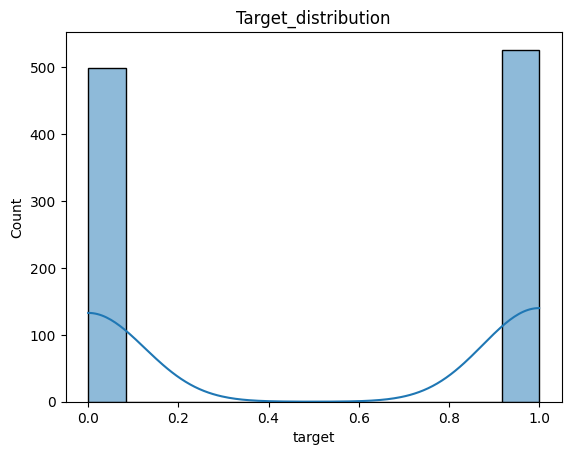

<ipython-input-78-d4a3f2cb56a8>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hdf,x= 'age',y='chol',ci=None,hue='age')


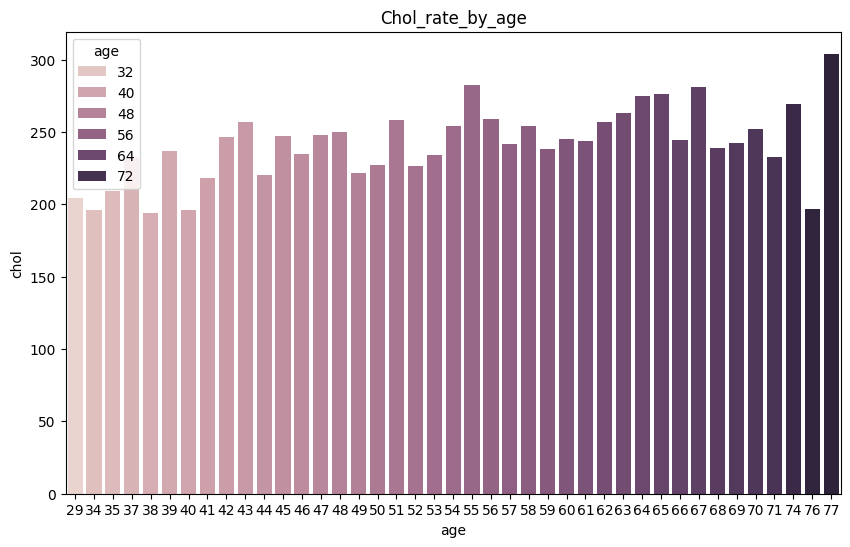

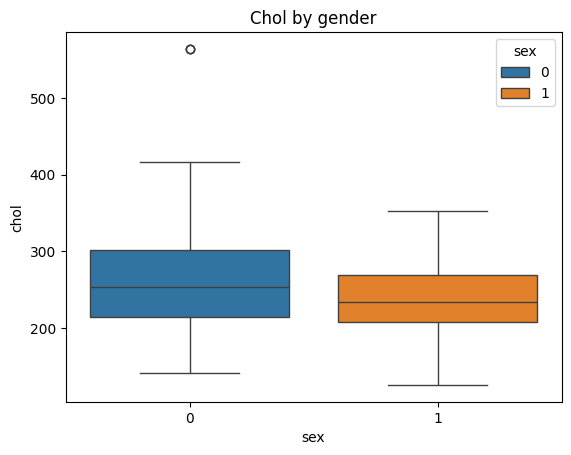

<ipython-input-78-d4a3f2cb56a8>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hdf , x='sex', y='target',ci=None,hue='sex')


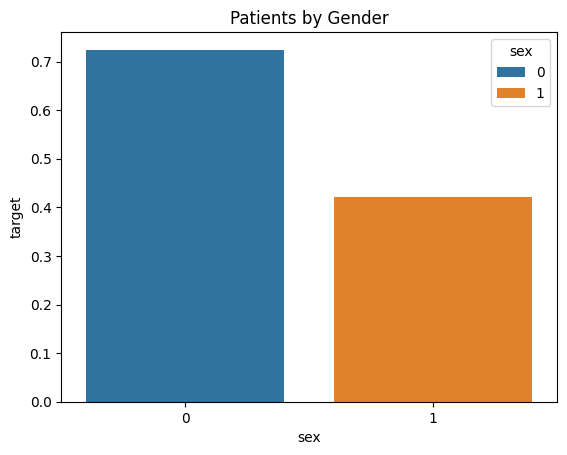

In [ ]:
# Plot 1: target Distribution
# The distribution will show how many patients fall into each category (disease present or absent)
sns.histplot(hdf['target'],kde=True,)
plt.title('Target_distribution')
plt.savefig('target Distribution.jpg', dpi=300)
plt.show()


# plot 2: chol rate by age
plt.figure(figsize = (10,6))
sns.barplot(data=hdf,x= 'age',y='chol',ci=None,hue='age')
plt.title('Chol_rate_by_age')
plt.savefig('Chol_rate_by_age.jpg', dpi=300)
plt.show()

# plot 3:chol by gender 1 is male 0 is female
sns.boxplot(data=hdf,x= 'sex',y='chol',hue='sex')
plt.title('Chol by gender')
plt.savefig('chol by gender.jpg', dpi=300)
plt.show()


# plot 4: patients by age
sns.barplot(data=hdf , x='sex', y='target',ci=None,hue='sex')
plt.title('Patients by Gender')
plt.savefig('patients by age.jpg', dpi=300)
plt.show()


# correlation

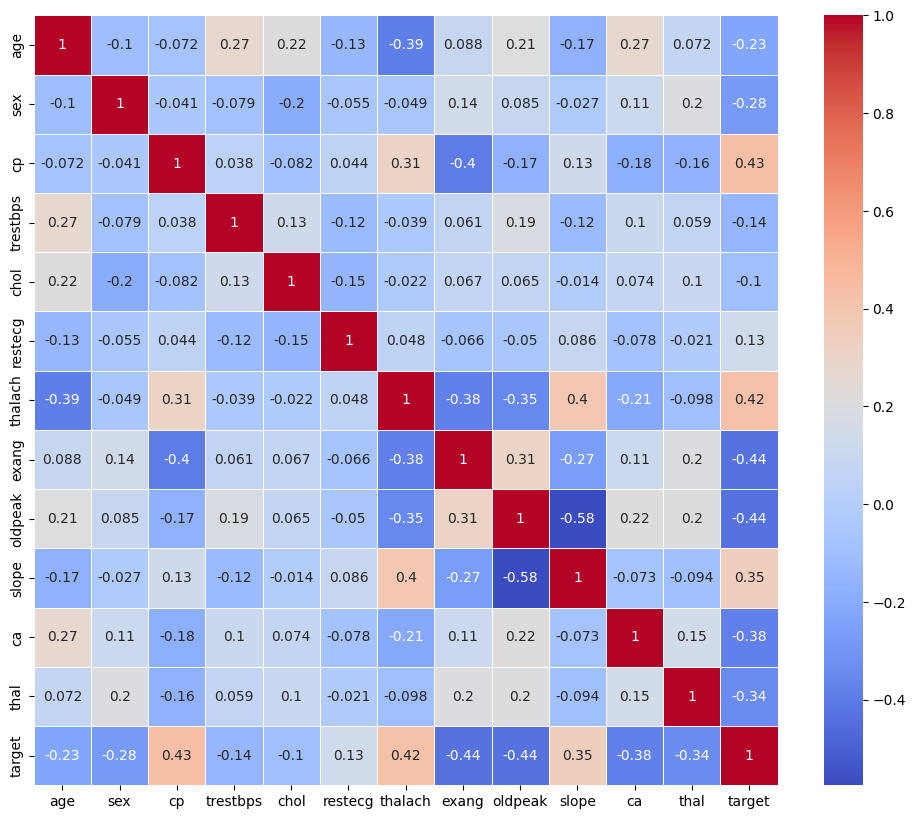

In [ ]:
# plot 5:Correlation Analysis
corr = hdf.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.savefig('correlation.jpg', dpi=300)
plt.show()

# Models_Training

**Data for Model Training**
Feature Scaling Scale the numerical features to ensure uniformity in range and distribution across all features.

In [ ]:
# Columns to Scale: Based on dataset, age, trestbps, chol, thalach and oldpeak
# are suitable for scaling because they are continuous
# and have varying units and ranges.




# Separate features (X) and target (y)
X = hdf.drop('target', axis=1)
y = hdf['target']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Identify columns to scale
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data and transform the training data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Use the same transformation on the test data (do not fit again)
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])



# Check the shapes of the training and testing sets
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

**1. Logistic Regression Hyperparameter Tuning**
Common Hyperparameters:


*  C: Inverse of regularization strength
* solver: Algorithm to use in optimization.



In [ ]:
# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1,  50, 100, 1000],  # Regularization strength
    'solver': ['saga', 'lbfgs', 'newton-cg']  # Optimization algorithms saga best for  larger datasets
}

# Initialize the GridSearchCV for Logistic Regression
grid_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)

# Train the model using Grid Search
grid_logreg.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters for Logistic Regression:", grid_logreg.best_params_)

# Evaluate the model with the best parameters
best_logreg = grid_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)

# Accuracy
logreg_accuracy = accuracy_score(y_test, y_pred_logreg) * 100
print("\nLogistic Regression Accuracy after tuning: {:.2f}%".format(logreg_accuracy))

Best parameters for Logistic Regression: {'C': 1, 'solver': 'saga'}

Logistic Regression Accuracy after tuning: 79.51%


**2. SVM Hyperparameter Tuning**
Common Hyperparameters:

* C: Regularization strength.
* gamma: Kernel coefficient.
* kernel: Type of kernel to use ('linear', 'rbf').

In [ ]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [20,25,50,100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1,15, 20,25]
}


# Initialize the GridSearchCV for SVM
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

# Train the model using Grid Search
grid_svm.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters for SVM:", grid_svm.best_params_)

# Evaluate the model with the best parameters
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)



# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm) * 100
print("SVM Accuracy after tuning: {:.2f}%".format(svm_accuracy))

Best parameters for SVM: {'C': 20, 'gamma': 1, 'kernel': 'rbf'}
SVM Accuracy after tuning: 97.07%


**3. Decision Tree Hyperparameter Tuning**
Common Hyperparameters:
* max_depth: Maximum depth of the tree.
* min_samples_split

In [ ]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 20, 25, 30, 40, 50],
    'min_samples_split': [ 5, 10, 15, 20, 30, 50]
}


# Initialize the GridSearchCV for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)

# Train the model using Grid Search
grid_dt.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters for Decision Tree:", grid_dt.best_params_)

# Evaluate the model with the best parameters
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt) * 100
print("Decision Tree Accuracy after tuning: {:.2f}%".format(dt_accuracy))

Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_split': 5}
Decision Tree Accuracy after tuning: 97.56%


**4. Random Forest Hyperparameter Tuning**
Common Hyperparameters:
* n_estimators: Number of trees in the forest.
* max_depth: Maximum depth of the tree
* min_samples_split: Minimum number of samples required to split a node.

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 100, 200],
    'max_depth': [5, 10, 50],
    'min_samples_split': [2, 5, 10]
}




# Initialize the GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

# Train the model using Grid Search
grid_rf.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Evaluate the model with the best parameters
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Accuracy 98.54%
rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100
print("Random Forest Accuracy after tuning: {:.2f}%".format(rf_accuracy))

Best parameters for Random Forest: {'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy after tuning: 98.54%


**5. k-Nearest Neighbors (k-NN) Hyperparameter Tuning**
Common Hyperparameters:
* n_neighbors: Number of neighbors to use.
* weights: Weight function used in prediction('uniform', 'distance').


In [ ]:
# Define the parameter grid for k-NN
param_grid_knn = {
    'n_neighbors': [2,5,7],
    'weights': ['uniform']
}

# Initialize the GridSearchCV for k-NN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# Train the model using Grid Search
grid_knn.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters for k-NN:", grid_knn.best_params_)

# Evaluate the model with the best parameters
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn) * 100
print("k-NN Accuracy after tuning: {:.2f}%".format(knn_accuracy))

Best parameters for k-NN: {'n_neighbors': 2, 'weights': 'uniform'}
k-NN Accuracy after tuning: 95.61%


****

**Deep_learning_Model**

 Multi-layer Perceptron (MLP): Definition: An MLP is a type of artificial neural network that consists of multiple layers of nodes (neurons). It includes an input layer, one or more hidden layers, and an output layer.

In [ ]:
# Define the MLP model
mlp_model = Sequential()

#hyperparameters tunning
mlp_model.add(Dense(68, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dense(34, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
mlp_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=40, callbacks=[early_stopping])

# Evaluate the model
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
mlp_accuracy = accuracy_score(y_test, y_pred_mlp) * 100
print("MLP Accuracy: {:.2f}%".format(mlp_accuracy))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6440 - loss: 0.6454 - val_accuracy: 0.7683 - val_loss: 0.5715
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8531 - loss: 0.4966 - val_accuracy: 0.7866 - val_loss: 0.5065
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8444 - loss: 0.4063 - val_accuracy: 0.7988 - val_loss: 0.4795
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8444 - loss: 0.3667 - val_accuracy: 0.7927 - val_loss: 0.4730
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8609 - loss: 0.3280 - val_accuracy: 0.8049 - val_loss: 0.4636
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8605 - loss: 0.3257 - val_accuracy: 0.7988 - val_loss: 0.4555
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9018 - loss: 0.2761 - val_accuracy: 0.7988 - val_loss: 0.4554
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8913 - loss: 0.2579 - val_accuracy: 0.7988 - 